<a href="https://colab.research.google.com/github/zahrafayya/fp-kk-water-potability/blob/main/Final_Project_KK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Prediction Using ANN

Water quality could determine the potability of a water
body. The characteristics between potable water and unpotable
water is hard to discern by people who used to live around a
water body as they have used to consume it on daily basis. Yet,
this could threaten both the ecosystem in it and people who live
around it. Therefore, the use of Artificial Neural Network
(ANN) to make model that can be used as a predictor of water
potability was proposed. Experiments using ANN to predict
water properties has been done and it shows that this approach
could be used to tackle real-world applications. Water quality
indicators from 3276 different water sources are included in our
dataset to train and test the ANN model. To find how many
hidden layers are needed for the ANN, Sheela, K., Deepa, S. N.,
method was used. For the optimizer algorithm, Adam
optimization technique was used iteratively. Furthermore, to
obtain the activation function, a rectified linear unit (ReLu)
approach was conducted.

# Dataset

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
github_url = 'https://raw.githubusercontent.com/winatungmiharja/water-quality-prediction/master/data.csv'
df = pd.read_csv(github_url)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
np.shape(df)

(3276, 10)

# Data Preprocessing

In this section, we first have to do some checking for Null/NaN values in datase

In [ ]:
print(df.isna().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


To clean up the values, we can use Average Method, or we can drop the data. After testing both method, fdropping the data give better accuracy

In [ ]:
# df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
# df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
# df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [ ]:
df = df.dropna()

In [ ]:
np.shape(df)

(2011, 10)

In [ ]:
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


the data shown in table below, it is clear that the
data has a big difference in mean and standard deviation. That inferring that we have to normalize our data using
Min-Max scaling Algorithm, to scales and translates each
feature individually such that it is in the given range on the
training set.

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [ ]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split Train and Test Data

will split the dataset for this experiment into 90% training data
and 10% test data 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [ ]:
kolom=['Model','Acc','Precision','Recall','F1']
HASIL_AKHIR=pd.DataFrame(columns=kolom)

In [ ]:
print('Training dataset: {}'.format(len(X_train)))
print('Test dataset: {}'.format(len(X_test)))

Training dataset: 1809
Test dataset: 202


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]
kolom=['Model','Acc','Precision','Recall','F1']

# Experiment Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
!pip install --quiet optuna
import optuna

In [ ]:
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

## Analysis best params

In [ ]:
def objective(trial, data = X, target = y):

    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
        'random_state': 228
    }
    
    model = DecisionTreeClassifier(**params)
    return cross_val_score(model, X_train_balanced, Y_train_balanced, cv = 10, scoring = 'accuracy').mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

[I 2022-12-13 14:50:22,429] A new study created in memory with name: no-name-aa9306aa-08fa-4a8f-9077-e4f5d5527c03
[I 2022-12-13 14:50:22,623] Trial 0 finished with value: 0.6061283376399655 and parameters: {'max_depth': 8, 'min_samples_leaf': 14, 'min_samples_split': 12}. Best is trial 0 with value: 0.6061283376399655.
[I 2022-12-13 14:50:22,766] Trial 1 finished with value: 0.589437984496124 and parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}. Best is trial 0 with value: 0.6061283376399655.
[I 2022-12-13 14:50:22,862] Trial 2 finished with value: 0.5583871662360035 and parameters: {'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 14}. Best is trial 0 with value: 0.6061283376399655.
[I 2022-12-13 14:50:23,001] Trial 3 finished with value: 0.5894358311800172 and parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 9}. Best is trial 0 with value: 0.6061283376399655.
[I 2022-12-13 14:50:23,149] Trial 4 finished with value: 0.6019

Number of finished trials: 50
Best trial: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 24}
Best value: 0.6265223944875107


In [ ]:
results = pd.DataFrame(columns = ['DTC', 'RF', 'LGBM', 'XGB'], index = range(4))

In [ ]:
repotability = {0: 'Not potable', 1: 'Potable'}

In [ ]:
params = study.best_params
params['random_state'] = 228
dtc = DecisionTreeClassifier(**params)
dtc.fit(X_train_balanced, Y_train_balanced)
y_pred = dtc.predict(X_test)
y_prob = dtc.predict_proba(X_test)[:,1]

## Result

In [ ]:
# Metrics
results.iloc[0, 0] = round(cross_val_score(dtc, X_train_balanced, Y_train_balanced, cv = 10, scoring = 'precision').mean(), 2)
results.iloc[1, 0] = round(cross_val_score(dtc, X_train_balanced, Y_train_balanced, cv = 10, scoring = 'recall').mean(), 2)
results.iloc[2, 0] = round(cross_val_score(dtc, X_train_balanced, Y_train_balanced, cv = 10, scoring = 'f1').mean(), 2)
results.iloc[3, 0] = round(cross_val_score(dtc, X_train_balanced, Y_train_balanced, cv = 10, scoring = 'roc_auc').mean(), 3)
dtc_cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 10 folds:')
print('')
print(f"ROC AUC: {results.iloc[3, 0]}")
print(f"precision: {results.iloc[0, 0]}")
print(f"recall: {results.iloc[1, 0]}")
print(f"f1: {results.iloc[2, 0]}")

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       126
           1       0.54      0.79      0.64        76

    accuracy                           0.66       202
   macro avg       0.68      0.69      0.66       202
weighted avg       0.71      0.66      0.67       202

ROC AUC score: 0.783

-----------------------------------------------------

Cross-validation scores with 10 folds:

ROC AUC: 0.676
precision: 0.63
recall: 0.63
f1: 0.62


## Confusion Matrix

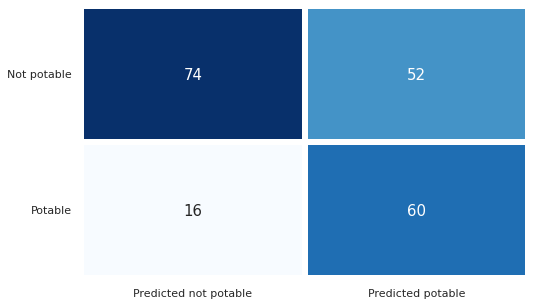

In [ ]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(dtc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not potable', 'Potable'], xticklabels = ['Predicted not potable', 'Predicted potable'])
plt.yticks(rotation = 0)
plt.show()

## Visualize Decision Tree


In [ ]:
X_train = pd.DataFrame(X_train_balanced, columns = df.columns[:9])

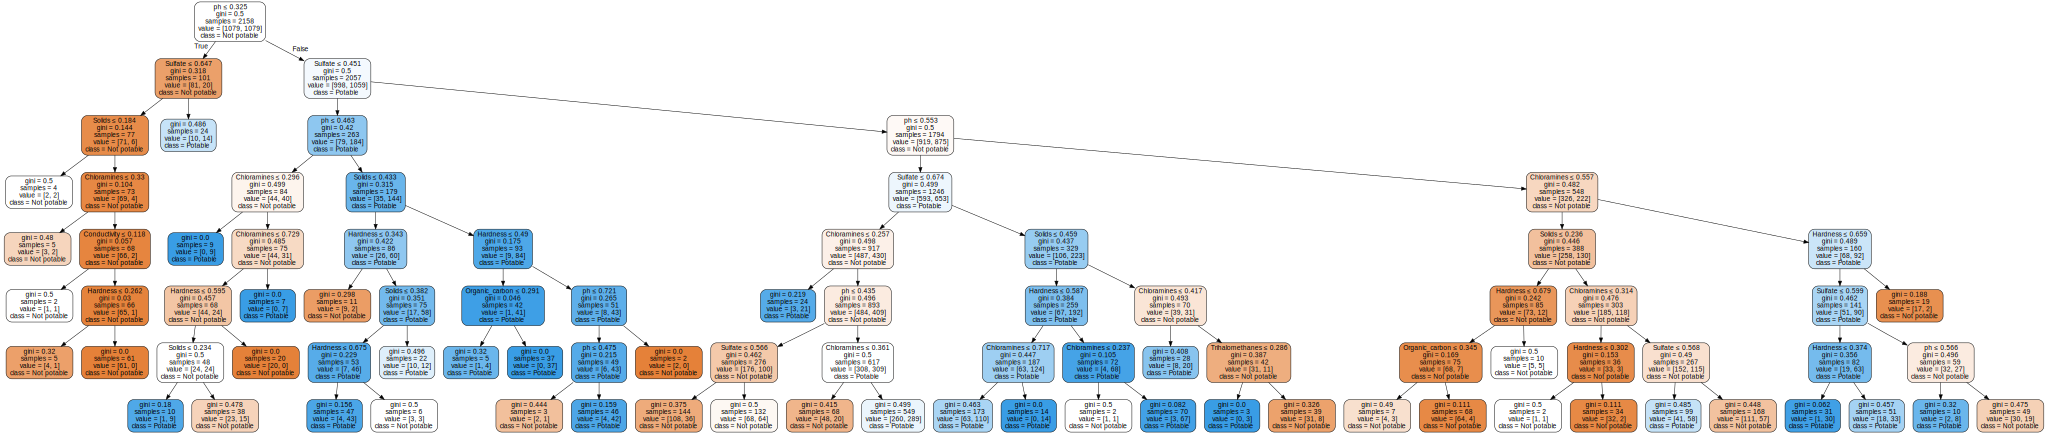

In [ ]:
# Decision tree
import graphviz 
from sklearn import tree

Y_train_balanced = Y_train_balanced.map(repotability)

# dtc = DecisionTreeClassifier(**params)
# dtc.fit(X_train_balanced, Y_train_balanced)

dot_data = tree.export_graphviz(dtc, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=Y_train_balanced,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

## ROC Curve


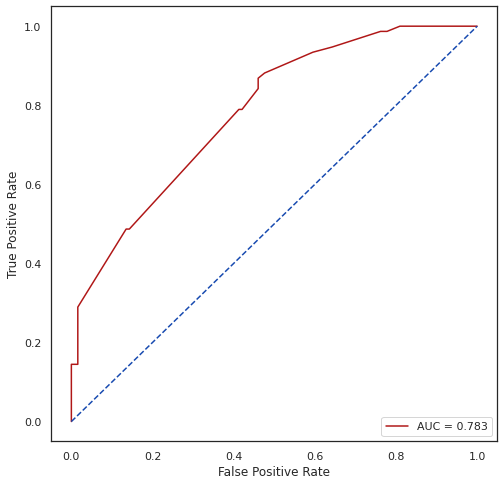

In [ ]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Experiment Using SVM

## Data Visualization

          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
1   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
2   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
3  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
4   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       18.436524       100.341674   4.628771           0  
1       11.558279        31.997993   4.075075           0  
2        8.399735        54.917862   2.559708           0  
3       13.789695        84.603556   2.672989           0  
4       12.363817        62.798309   4.401425           0  


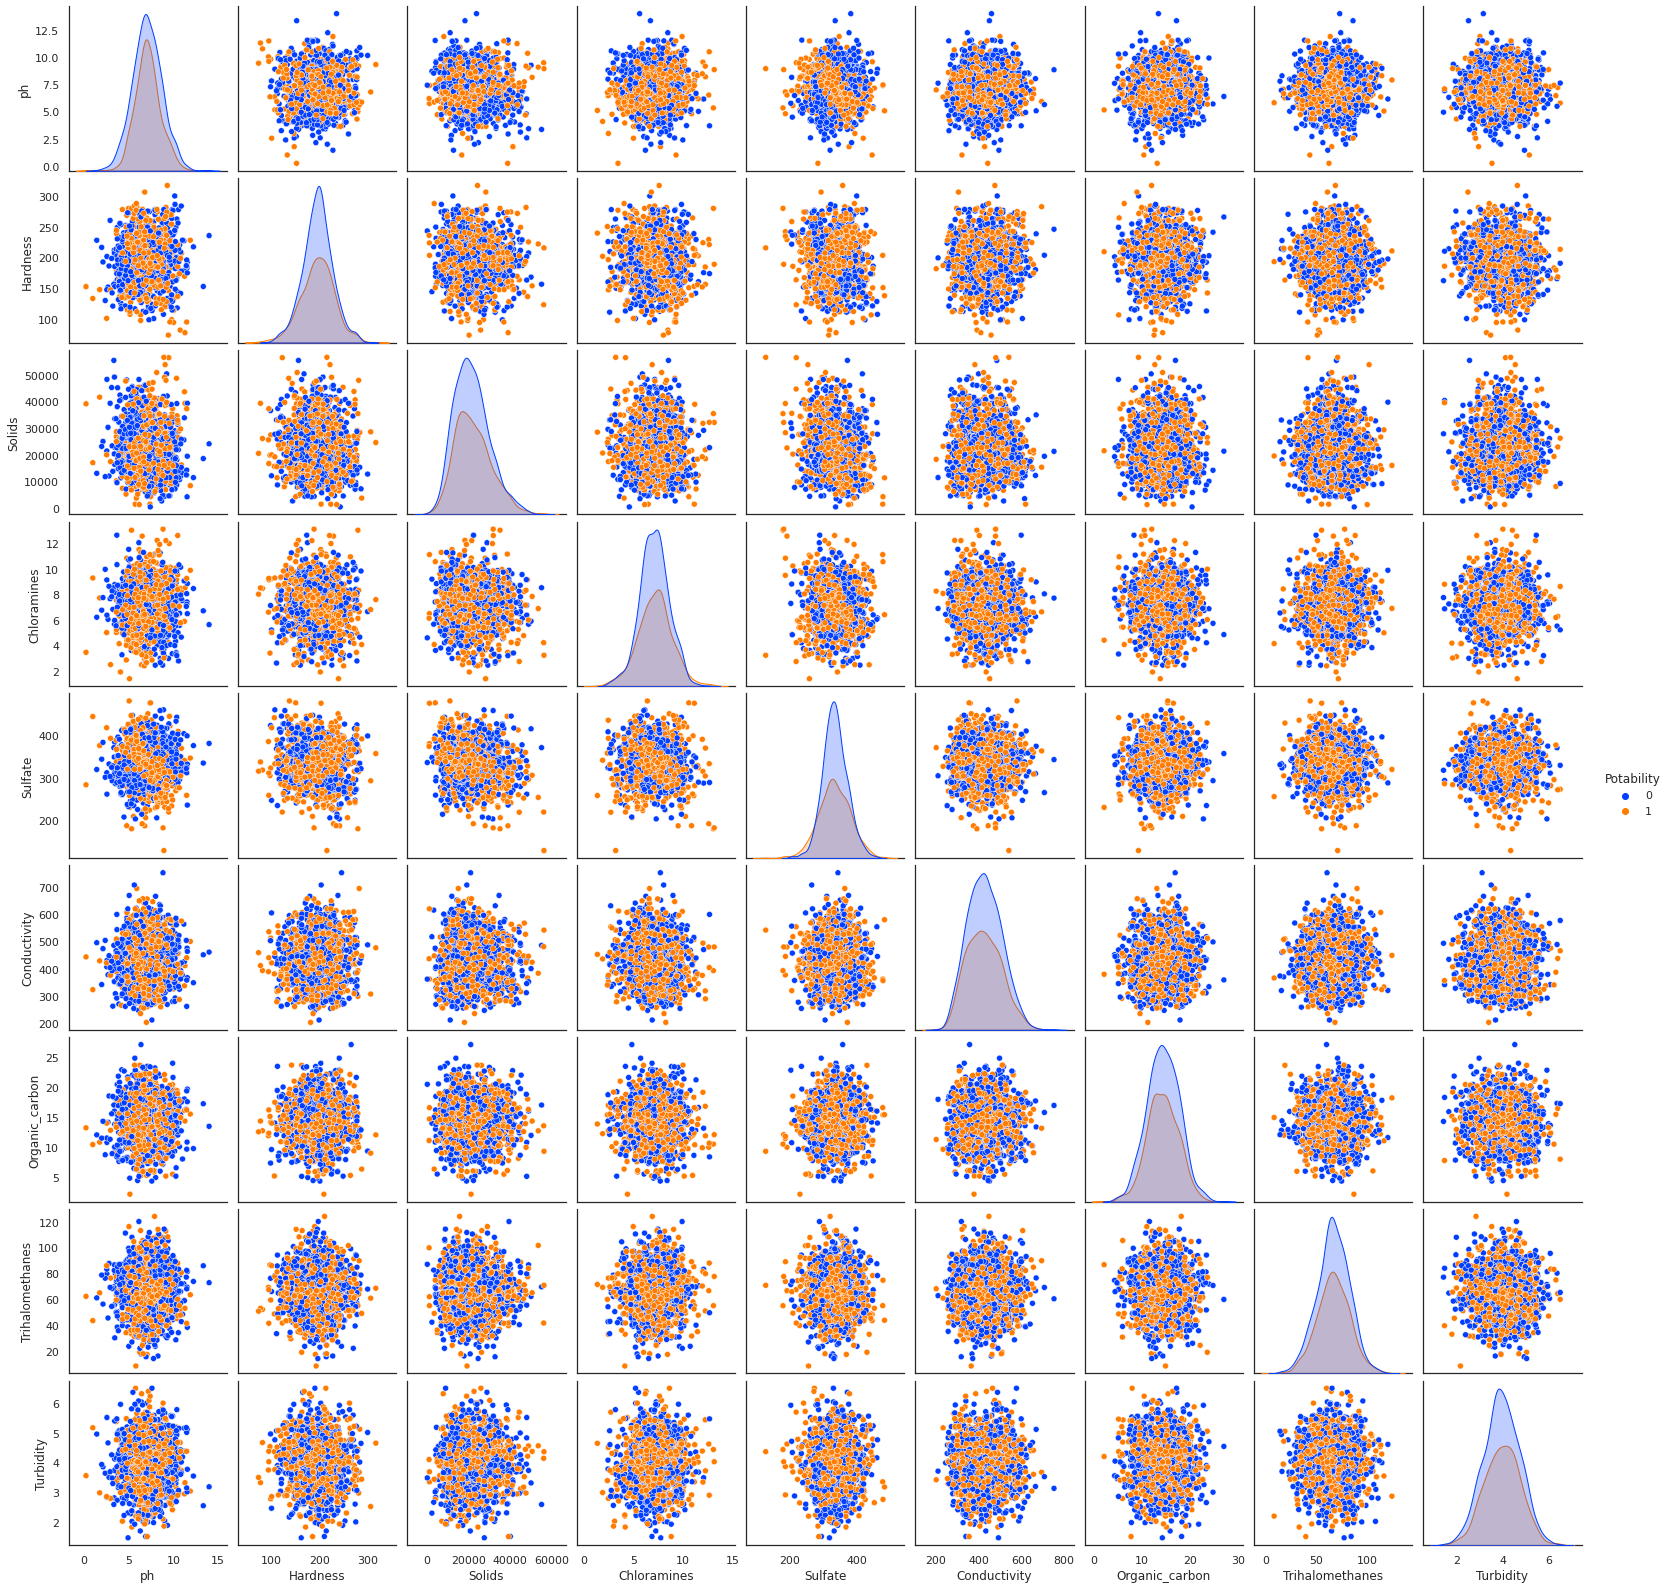

In [ ]:
import seaborn as sns
data = df
y = data.Potability
X = data.drop('Potability',axis=1)
sns.pairplot(data, hue="Potability",palette="bright")

## Analysis

In [ ]:
from sklearn import svm
clf = svm.SVC(degree=5, max_iter=-1)
clf.fit(X_train, y_train)

SVC(degree=5)

In [ ]:
# predict model ke data test
y_pred_svm=clf.predict(X_test)

NameError: ignored

## Result

In [ ]:
get_metrics(y_test,y_pred_svm)

[0.7178, 0.7476, 0.7178, 0.6768]

In [ ]:
hasil_SVM=pd.DataFrame(columns=kolom)
hasil=['svm']+get_metrics(y_test,y_pred_svm)
hasil_SVM=pd.concat([hasil_SVM,pd.DataFrame([hasil],columns=kolom)])
print(hasil_SVM)

  Model     Acc  Precision  Recall      F1
0   svm  0.7178     0.7476  0.7178  0.6768


## Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

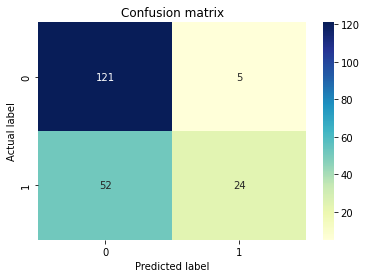

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## ROC Curve

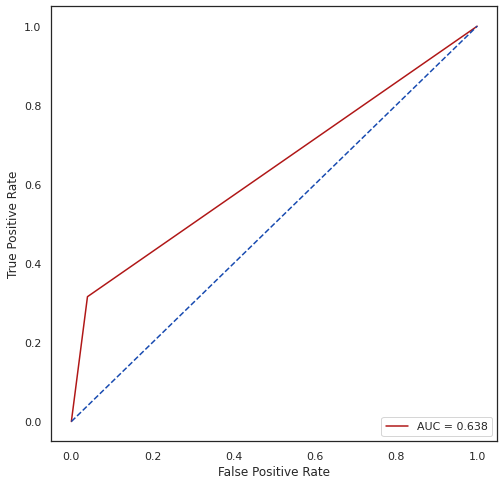

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Experiment Using ANN

## ANN Prediction



In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

Early Stopping helps our model to not overfit the train data

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", mode ='auto', patience=15)

### Number of Neuron
 Sheela, K., Deepa, S. N., method, (Yotov, 2020) Sheela
and Deepa’s method has been the most successful in
predicting the optimal number of neurons. The method has a
formula:
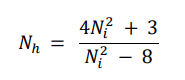

## Optimizer
Adam is an optimization technique that may be used to
iteratively update network weights depending on training data.
The reason for using this method, is because Adam is well
suited for problems that are large in terms of data and/or
parameters.

## Activation
ReLu, a rectified
linear unit (also known as a unit using a rectifier) produces
raw output if the input is greater than 0, and 0 otherwise. In
other words, the output is identical to the input if the input is
higher than 0. ReLU's operation is more similar to how
organic neurons function.
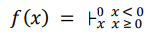

## Loss Function
The loss function was
calculated using the root mean square error (MSE)
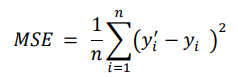


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(4, activation='relu', input_dim=9))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
result = model.fit(X_train, y_train, batch_size=75, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/300
25/25 [==============================] - 1s 9ms/step - loss: 0.7217 - accuracy: 0.5937 - val_loss: 0.5687 - val_accuracy: 0.6238
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.5937 - val_loss: 0.4182 - val_accuracy: 0.6238
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.5937 - val_loss: 0.3297 - val_accuracy: 0.6238
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.5937 - val_loss: 0.2833 - val_accuracy: 0.6238
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.5937 - val_loss: 0.2609 - val_accuracy: 0.6238
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.5943 - val_loss: 0.2513 - val_accuracy: 0.6287
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.5948 - val_loss: 0.2474 - val_accuracy: 0.6238
Epoch 8/300
2

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

7/7 [==============================] - 0s 2ms/step


In [ ]:
get_metrics(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.6238, 0.3891, 0.6238, 0.4792]

In [ ]:
hasil=['ANN']+get_metrics(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
hasil_ANN=pd.DataFrame(columns=kolom)
hasil_ANN=pd.concat([hasil_ANN,pd.DataFrame([hasil],columns=kolom)])
print(hasil_ANN)

  Model     Acc  Precision  Recall      F1
0   ANN  0.6386      0.616  0.6386  0.5778


Accuracy is pretty low

To find the optimal method and number
of neurons, in this experiment we use Grid Search algortihm
to find the best option with highest accuracy.
Grid Search involves setting up a grid of hyperparameters
and training/testing our model on all of the potential
combinations. We can now look at the parameters that worked
best with Random Search to determine the ones to utilize in
Grid Search and create a grid based on those parameters to see
if a better combination can be found.

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# def DL_Model(activation= 'linear', neurons= 5, optimizer='Adamax'):
#     model = Sequential()
#     model.add(Dense(neurons, activation= activation, input_dim=9))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])
#     return model

# activation = ['softmax', 'relu', 'sigmoid']
# neurons = [20]
# optimizer = ['Adam', 'Adamax', 'SGD']
# param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

# clf = KerasClassifier(build_fn= DL_Model, epochs= 5, batch_size=75, verbose= 2)

# model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
# model.fit(X_train,y_train)

# print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), model.best_params_))

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=9))
model.add(layers.Dense(1))
opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
new = model.fit(X_train, y_train, batch_size=75, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/300
25/25 [==============================] - 1s 10ms/step - loss: 0.2658 - accuracy: 0.5954 - val_loss: 0.2453 - val_accuracy: 0.5990
Epoch 2/300
25/25 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.5799 - val_loss: 0.2454 - val_accuracy: 0.5842
Epoch 3/300
25/25 [==============================] - 0s 5ms/step - loss: 0.2423 - accuracy: 0.5882 - val_loss: 0.2411 - val_accuracy: 0.6089
Epoch 4/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2416 - accuracy: 0.5909 - val_loss: 0.2389 - val_accuracy: 0.6337
Epoch 5/300
25/25 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.5937 - val_loss: 0.2378 - val_accuracy: 0.6337
Epoch 6/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2412 - accuracy: 0.5976 - val_loss: 0.2364 - val_accuracy: 0.6337
Epoch 7/300
25/25 [==============================] - 0s 8ms/step - loss: 0.2406 - accuracy: 0.6003 - val_loss: 0.2364 - val_accuracy: 0.6386
Epoch 8/300


In [ ]:
np.mean(new.history['val_accuracy'])

0.6862844822130033

## Results

In [ ]:
import matplotlib.pyplot as plt

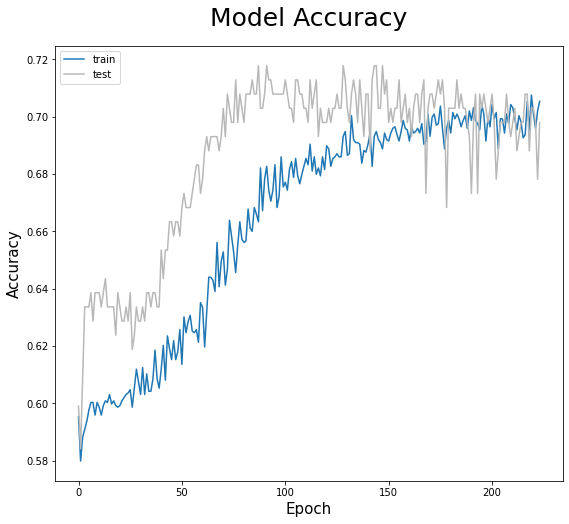

In [ ]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(new.history['accuracy'])
plt.plot(new.history['val_accuracy'], color = '#B8B8B8')
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
np.mean(new.history['val_accuracy'])

0.6862844822130033

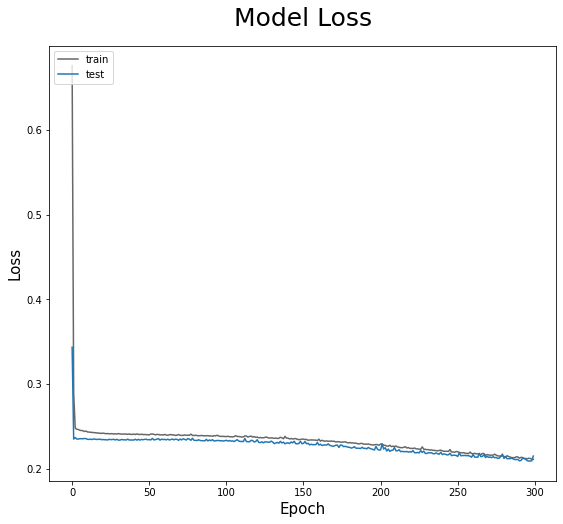

In [ ]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(new.history['loss'], color = '#676767')
plt.plot(new.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

## Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

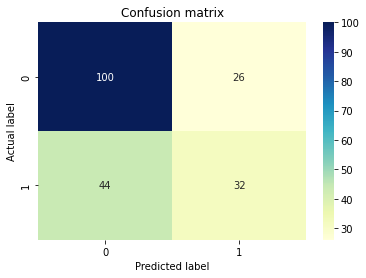

In [ ]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, cross_val_score


results = pd.DataFrame(columns = ['DTC', 'RF', 'LGBM', 'XGB'], index = range(4))

def build_classifier():
	classifier = Sequential()
	
	classifier.add(Dense(20, activation='relu', input_dim=9))
	classifier.add(Dense(1))
	classifier.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
	return classifier
classifier = KerasClassifier(build_fn=build_classifier,batch_size = 75,nb_epoch = 300)

results.iloc[0, 1] = round(cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=10,scoring = 'precision').mean(), 2)
results.iloc[1, 1] = round(cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=10,scoring = 'recall').mean(), 2)
results.iloc[2, 1] = round(cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=10,scoring = 'f1').mean(), 2)
results.iloc[3, 1] = round(cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=10,scoring = 'roc_auc').mean(), 3)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [ ]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

7/7 [==============================] - 0s 2ms/step


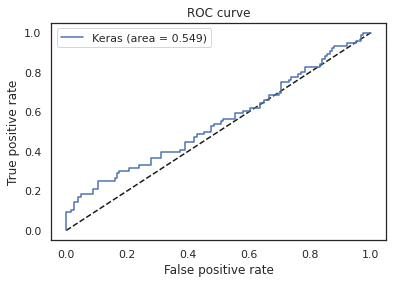

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

7/7 [==============================] - 0s 2ms/step


# Analysis

In [ ]:
repotability = {0: 'Not potable', 1: 'Potable'}
df['Potability'] = df['Potability'].map(repotability)

fig = px.pie(df['Potability'].value_counts().reset_index(), values = 'Potability', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#F0F0F0','#B8B8B8'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = ' Distribution of <br>water potability', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'sans-serif',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

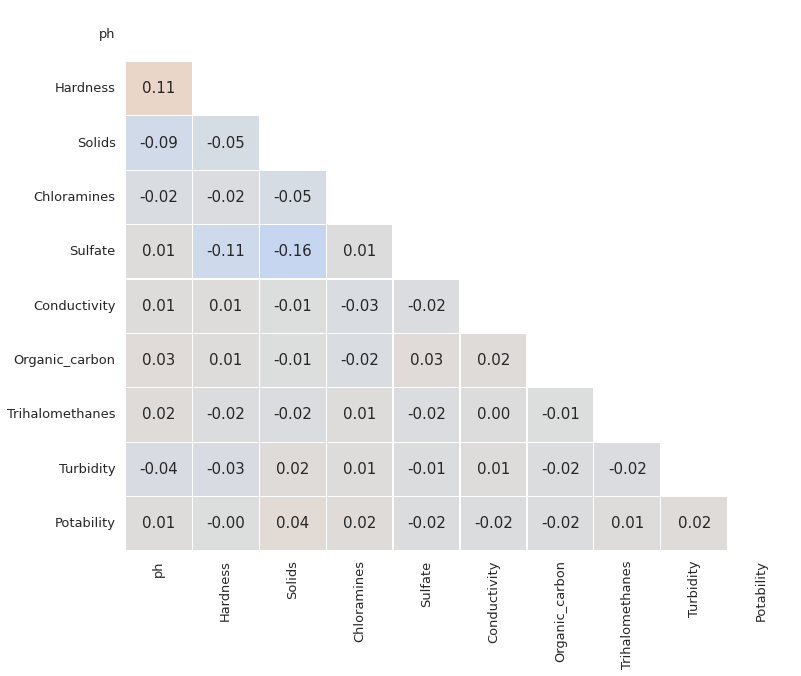

In [ ]:
repot = {'Not potable': 0, 'Potable': 1}
df['Potability'] = df['Potability'].map(repot)

matrix = np.triu(df.corr())
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt=".2f", mask = matrix, vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False, annot_kws = {'fontsize': 15})
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

df['Potability'] = df['Potability'].map(repotability)

These findings show a really interesting conclusion, which
raises several assumption from us regarding the not-so-high
accuration. The amount of many indicators, including solids,
chloramines, sulfates, and organic carbon, is hazardous in all
observations. It may not possible for these indicators to have
higher values for drinkable water. The Indicators should be
attributed and/or biased to non-potable water based on basic
principles of chemistry. The only plausible reason we can find
a drinkable water result is that the normal signs in one
category would level out as a result of the heightened
indicators in another area, but this is may not be the case. From
the heatmap above, it shows also that the distribution of
potable and non-potable water in every column is nearly
identical.